## Прогнозирование оттока пользователей

Содержание:
### 1)  <a href ='#indtrodution'> Цели и задачи проекта </a>
- <a href='#main question'> Для чего это нужно?</a>
- <a href='#main tasks'> Основные задачи проекта</a>
    
### 3) <a href='#solution'> Техническое описание решения </a>
- <a href='#EDA'> Анализ датасета </a>
- <a href='#data processing pipeline'> Обработка данных </a>
- <a href='#model pipeline'> Построение модели и Методика измерения качества</a>



### 4) <a href='#quality '> Выводы о качестве модели </a>
- <a href='#feature importance'> Оценка значимых признаков </a>
- <a href='#ecenomic effect'> Оценка экономического эффекта </a>

### 5) <a href='#conclusion'> Итоги проделанной работы </a>
- <a href='#interesting methods'> Интересные инструменты/методы анализа, которые не рапспространены в рамках обучения
- <a href='#upgrade recomendation'> Советы по улучшению модели, что ещё следует попробовать



<a id='indtrodution'></a>
## Цели и задачи проекта
Основная цель  - построить модель прогнозирования оттока пользователей телеком компании на заранее подготовленном датасете. Нам не предоставляется информация об признаках датасета. Часть признаков не имеют какого-либо значения.

<a id='main question'></a>
### Для чего это нужно?
Большинство источников утверждают, что в среднем стоимость привлечения нового пользователя в 5 раз больше стоимости удержания старых клиентов. Благодаря модели прогнозирования оттока мы можем находить пользователей, которые собираются уйти от нас и попытаться вернуть их на основании нового предложения.

<a id='main tasks'></a>
### Основные задачи проекта
**Задачи:**
1. Описательный анализ данных
2. Подготовка данных, выбор метрик и стратегий
3. Построение baseline-решений
4. Построение и оптимизация модели
5. Эксперименты с моделью
6. Оценка эффекта от внедрения


<a id='solution'></a>
## Техническое описание решения

Построение модели прогнозирования оттока состоит из 4-ёх основных этапов:
1. Анализ датасета
2. Обработки данных
3. Построение модели
4. Измерения качества


<a id='EDA'></a>
## Анализ датасета
В датасете целевые признаки имеют класс 1 и -1 

Целевея метка распределена ненормально:
 1    0.9256 - класс не отток
-1    0.0744 - класс отток

Датасет состоит из 230 признаков из них
1. float64    190 - численный признак
2. object      38 - категориальный признак
3. int64        2 - категориальный признак


Почти все признаки имеют пропуски. Только 19 признаков не имеют ни одного пропуска

Описание численных признаков в разбиении классов отток/ не отток:
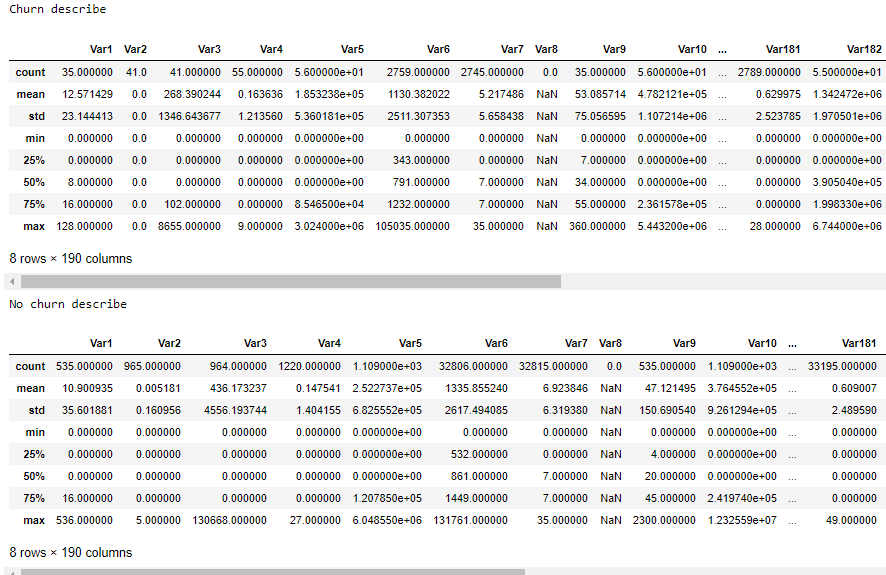

Топ 10 наиболее коррелируемых числовых признаков
- Var177 ...    0.060160
- Var73  ...    0.069550
- Var7   ...    0.072437
- Var19  ...    0.074202
- Var111 ...    0.076956
- Var53  ...    0.079045
- Var188 ...    0.095238
- Var131 ...    0.096202
- Var189 ...    0.122501
- Var168 ...    0.135305

Топ 10 наименее коррелируемых числовых признаков

- Var123 ...    0.000115
- Var129 ...    0.000335
- Var44  ...    0.000524
- Var104 ...    0.000711
- Var105 ...    0.000711
- Var146 ...    0.001320
- Var133 ...    0.001355
- Var16  ...    0.002033
- Var181 ...    0.002250
- Var4   ...    0.002343

#### Попарное распределение топ 5 наиболее коррелируемых численных признаков. Можно заметить ,что 
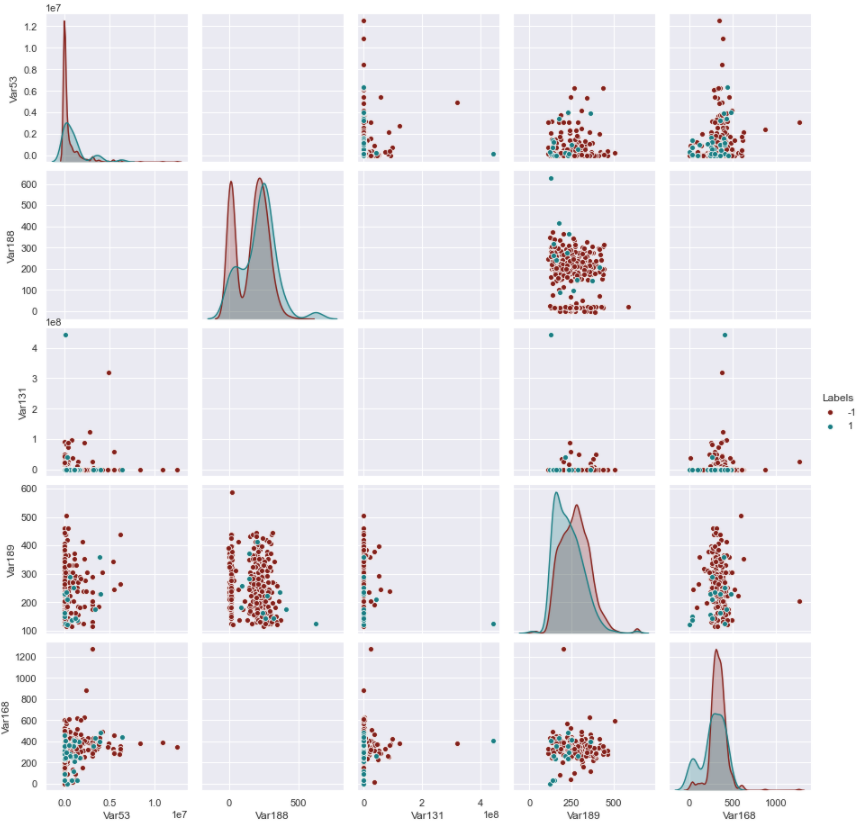

#### Распределения категориальных признаков выглядит почти одинаковым:

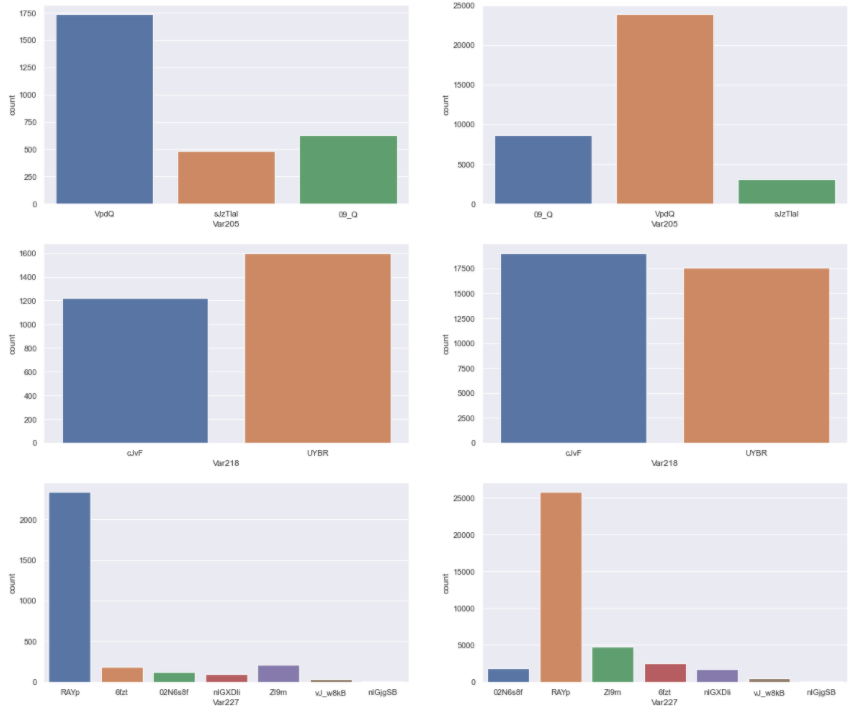

<a id='data processing pipeline'></a>
## Обработка данных

Для того, чтобы обучить базовую модель (деревья , линейные модели) , нужно убрать пропуски данных, перевести значение категориального признака в число - заокдировать. Помимо этого , для линейных моелей желательно масштабировать сами признаки, чтобы наша модель при обучении искуственно не завышала вес данного признака. Помимо этого, нам так же стоит учесть тот фактор, что масштабы целевых меток в идеальном случае должны соотноситься 1 к 1. В нашем же случаче объектов класса не отток почти в 20 раз больше. Все эти задачи мы обсудим в блоке обработки данных:

### Заполнение пропусков:
Метод заполнения пропусков реализован в ноутбуке model_expirements.ipynb в функцции fill_na

Чтобы заполнить пропуски и в категориальных признаках ,я заранее использовал CatBoostEncoder, оценивал качество с помощью F1 меры, обучая XGBoost классицифатор.

Всего я использовал 4 стратегии заполнения пропусков и получил такие результаты :
- Заполнение средним  - 0.4864923399593236
- Заполнение медианой - 0.48753560650378114
- Заполнение модой    - 0.48872489612188363
- Заполнением 0       - 0.48944687101562645

### Кодирование категориальных признаков:
Метод кодирования категориальных признаков реализован в ноутбуке model_expirements.ipynb в функцции cat_coding. 

Для категориальных признаков я использовал 5 стратегии заполнения пропусков и получил такие результаты :
- Частотное кодирование - 0.48954852281798805
- Кодирование средним  - 0.48941302599839187
- Комбинирование частотного кодирования со средним - 0.4893792003361963
- leave one out кодирование - 0.48944687101562645
- CatBoost кодирование - 0.48944687101562645



### Масштабирование признаков:
Так как я не использую линейные модели для прогнозирования оттока , признаки разных масштабов не изменят качество деревьев. Масштабирование признаков я не использовал.

### Масштабирование классов:
Наш датасет состоит из 40000 строк, где 95% объектов класса 1. Чтобы модель недообучалась и не относила все объекты к одному классу, можно применить 2 типа масштабирования: undersampling или oversampling. В данном случае я использовал undesampling ,чтобы размер датасета был меньшеисходного. аким образом мы можем потратить меньше времени на обучение модели.






<a id='model pipeline'></a> 
## Построение модели и методика измерения качества модели
Для конечного решения был использован алгоритм XGBoost с гиперпараметрами  
{ 'n_estimators': 7, 'gamma': 0.01728174027148935, 'learning_rate': 0.620295165652943, 'max_depth': 23, 'colsample_bytree': 0.8387860909193084, 'reg_lambda': 19}


Для оптимизации гиперпараметров я использовал библиотеку optuna. Методика измерения качества F1- мера.


<a id='quality'></a> 
## Выводы о качестве модели

Средний показатель точности на тесте = 0.553. Модель правильно находит 80% пользоватей класса не отток и 46% пользователей класса класса отток.
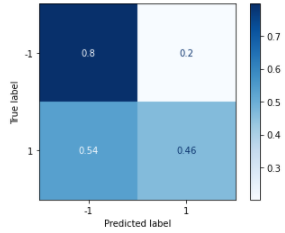

<a id='feature importance'></a>
### Оценка значимых признаков
Главными признаками оказались Var139 и Var12
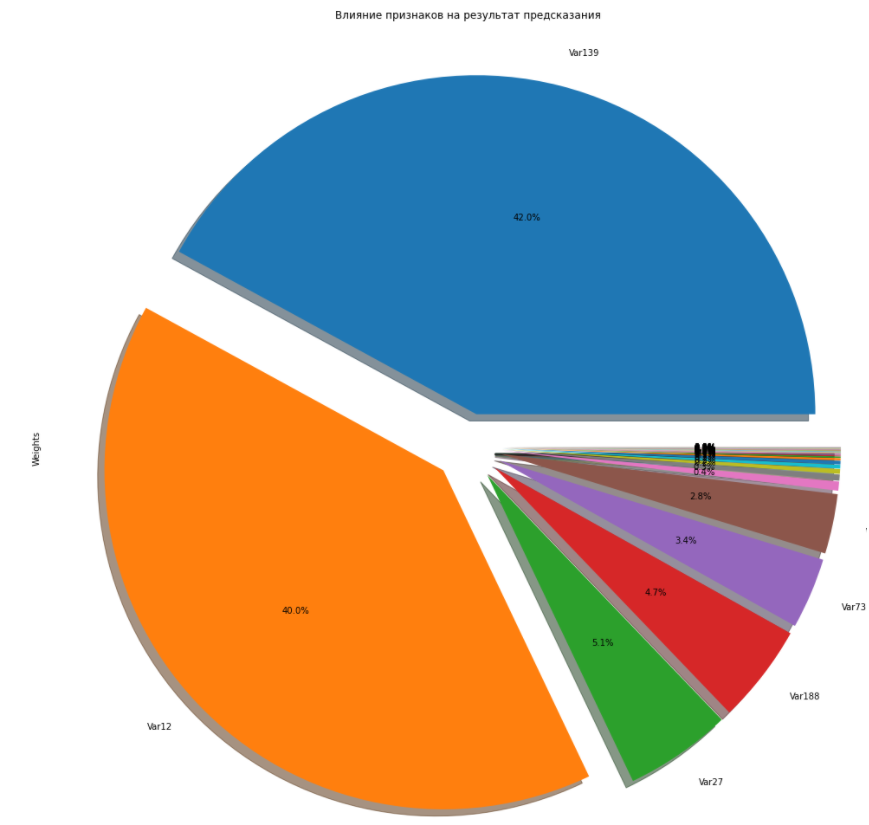


<a id='ecenomic effect'></a> 
## Оценка экономического эффекта

Для оценки экономического эффекта я сделал симуляцию работы телеком. компании, с такими гиперпараметрами, как : 
1. Средняя стоимость тарифа
2. Стоимость звонка 
3. Стоимость услуг на новых условиях
4. Вероятность принятия данных услуг

Ниже представлн граффик экономического развития бизнеса с учётом прогнозирования оттока и без. "Top"- какому проценту пользователей принадлежащим к классу отток мы быдем предоставлять новые условия партнёрства.

Реализацию экономической модели можно найти в файле economic_effect_model.ipynb 
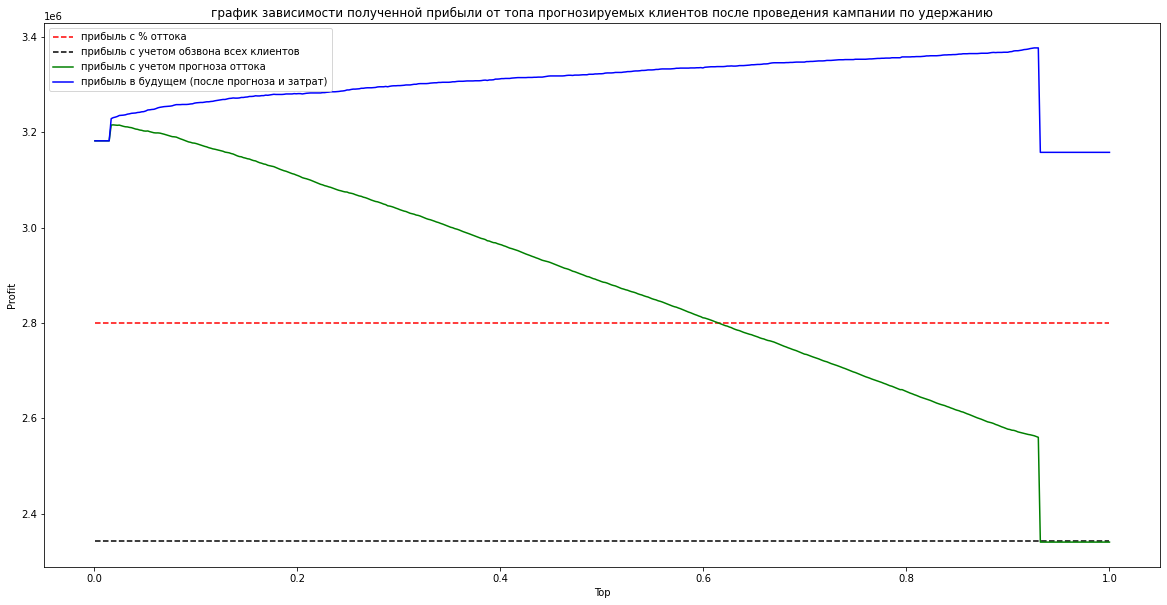

<a id='conclusion'></a>
## Итоги работы 
Я построил модель прогнозирования оттока пользователей телеком компаний. Получил модель позволяет находить 80% пользователей класса не отток и 46% пользователей класса отток. Данная модель показала, что главными признаками оказались Var139 и Var12. Помимо этого я смог снизиь размер выборки с 40000х230 до 4000x40. Что существенно повлияло на скорость обучения и подбора гиперпараметров модели. C помощью построения экономической модели, я смог выяснить, что данная модель будет приносить прибыль уже с первого месяца её использования.  Благодаря данной модели, мы можем держать большую чачсть пользователей, минимизируя их отток.

<a id='interesting methods'></a>
### Интересные инструменты/методы анализа, которые не рапспространены в рамках обучения:
Одной из главных отличительных черт данного проекта - использование новой библиотеки подбора гиперпараметров на основе байесовских алгоритмов. Так же для отбора признаков я использовал модель selectKBest с параметром score_func=f_classif и k=40.

<a id='upgrade recomendation'></a>
### Советы по улучшению модели, что ещё следует попробовать:

Для оптимизации работы следовало бы использовать метод Pipeline из sklearn. Помимо этого ,для более наглядного анализа следовало бы использовать методы понижения размерности Multicore TSNE для визуализации данных и представления их в двумерном пространстве. Так же стоило попробовать вместо отбора признаков - сжатие/ группировка нескольких признаков в 1. 